<a href="https://colab.research.google.com/github/aaryans99/CS-6375-Machine-Learning/blob/main/Assignment%202/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6375 ML - Assignment 2**

Aaryan Singh - axc230019

Nikunj Gohil - ndg220000

---



**Neural Networks**

---

Dataset Information

> The inputs are as follows\
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)\
X2=the house age (unit: year)\
X3=the distance to the nearest MRT station (unit: meter)\
X4=the number of convenience stores in the living circle on foot (integer)\
X5=the geographic coordinate, latitude. (unit: degree)\
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

1. Importing Libraries






In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

2. Importing Dataset and Preprocessing

In [2]:
url = 'https://github.com/aaryans99/CS-6375-Machine-Learning/raw/main/Real%20estate%20valuation%20data%20set.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [3]:
# check for null values
df.isna().sum()
# remove unwanted column
df = df.drop(columns=["No"], axis=1)

In [4]:
# Convert TWD per Ping to USD per square meter
exchange_rate_TWD_to_USD = 0.031
ping_to_square_meter = 3.3
df['Y house price of unit area'] = (df['Y house price of unit area'] * exchange_rate_TWD_to_USD) / ping_to_square_meter

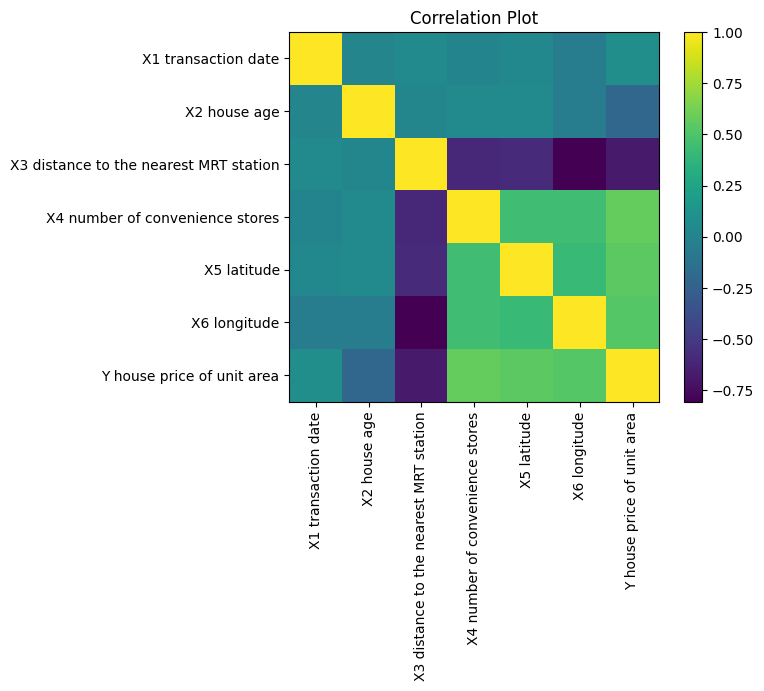

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
#Heat Map
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Plot')
plt.show()
M=corr_matrix
M

In [6]:
#Standardizing the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

2.   Splitting Data



In [80]:
Y = scaled_df['Y house price of unit area']
X = scaled_df[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
scaled_df.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=90)

print("Training Set:")
print(np.shape(X_train))
print(np.shape(Y_train))
print("\nTesting Set:")
print(np.shape(X_test))
print(np.shape(Y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB
Training Set:
(331, 3)
(331,)

Testing Set:
(83, 3)
(83,)


3. Neural Net Creation
*   Defining the activation functions, their derivatives and the loss function.




In [33]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def tanh(x):
  # tanh activation function: f(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def deriv_tanh(x):
  # Derivative of tanh: f'(x) = (1 - f(x)**2)
  fx = tanh(x)
  return (1 - (fx)**2)

def reLu(x):
  # ReLu activation function: f(x) = 0 if x <= 0 else x
  return max(0, x)

def deriv_reLu(x):
  # Derivative of ReLu: f'(x) = 0 if x <= 0 else 1
  return max(0, 1)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()



*   Defining our Neural Network




In [115]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 3 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self, act):
    # Assigning activation function
    if act == 'sigmoid':
      self.act = sigmoid
      self.deriv_act = deriv_sigmoid
    elif act == 'tanh':
      self.act = tanh
      self.deriv_act = deriv_tanh
    elif act == 'reLu':
      self.act = reLu
      self.deriv_act = deriv_reLu
    else:
      print("Invalid activation fuction")
      exit(1)

    # Weights
    # i/p -> hidden
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # hidden -> o/p
    self.w7 = np.random.normal()
    self.w8 = np.random.normal()

    # Biases
    # i/p
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()

    # hidden
    self.b3 = np.random.normal()

    print("Weights:", self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.w8)
    print("Bias:", self.b1, self.b2, self.b3)

    # Forward pass
  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = self.act(self.w1 * x[0] + self.w2 * x[1] + self.w3 * x[2] + self.b1)
    h2 = self.act(self.w4 * x[0] + self.w5 * x[1] + self.w6 * x[2] + self.b2)
    o1 = self.act(self.w7 * h1 + self.w8 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues, learn_rate, epochs):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''



    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.w3 * x[2] + self.b1
        h1 = self.act(sum_h1)

        sum_h2 = self.w4 * x[0] + self.w5 * x[1] + self.w6 * x[2] + self.b2
        h2 = self.act(sum_h2)

        sum_o1 = self.w7 * h1 + self.w8 * h2 + self.b3
        o1 = self.act(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w7 = h1 * self.deriv_act(sum_o1)
        d_ypred_d_w8 = h2 * self.deriv_act(sum_o1)
        d_ypred_d_b3 = self.deriv_act(sum_o1)

        d_ypred_d_h1 = self.w7 * self.deriv_act(sum_o1)
        d_ypred_d_h2 = self.w8 * self.deriv_act(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * self.deriv_act(sum_h1)
        d_h1_d_w2 = x[1] * self.deriv_act(sum_h1)
        d_h1_d_w3 = x[2] * self.deriv_act(sum_h1)
        d_h1_d_b1 = self.deriv_act(sum_h1)

        # Neuron h2
        d_h2_d_w4 = x[0] * self.deriv_act(sum_h2)
        d_h2_d_w5 = x[1] * self.deriv_act(sum_h2)
        d_h2_d_w6 = x[2] * self.deriv_act(sum_h2)
        d_h2_d_b2 = self.deriv_act(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w3
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w6
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w7 -= learn_rate * d_L_d_ypred * d_ypred_d_w7
        self.w8 -= learn_rate * d_L_d_ypred * d_ypred_d_w8
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        r2_loss = r2_score(y_preds, all_y_trues)
        print("Epoch %d loss: %.3f r2: %.3f" % (epoch, loss, r2_loss))

    return [self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.w8, self.b1, self.b2, self.b3]

  def train_relu(self, data, all_y_trues, learn_rate, epochs):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''



    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.w3 * x[2] + self.b1
        h1 = self.act(sum_h1)

        sum_h2 = self.w4 * x[0] + self.w5 * x[1] + self.w6 * x[2] + self.b2
        h2 = self.act(sum_h2)

        sum_o1 = self.w7 * h1 + self.w8 * h2 + self.b3
        o1 = sum_o1
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w7 = h1 * self.deriv_act(sum_o1)
        d_ypred_d_w8 = h2 * self.deriv_act(sum_o1)
        d_ypred_d_b3 = self.deriv_act(sum_o1)

        d_ypred_d_h1 = self.w7 * self.deriv_act(sum_o1)
        d_ypred_d_h2 = self.w8 * self.deriv_act(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * self.deriv_act(sum_h1)
        d_h1_d_w2 = x[1] * self.deriv_act(sum_h1)
        d_h1_d_w3 = x[2] * self.deriv_act(sum_h1)
        d_h1_d_b1 = self.deriv_act(sum_h1)

        # Neuron h2
        d_h2_d_w4 = x[0] * self.deriv_act(sum_h2)
        d_h2_d_w5 = x[1] * self.deriv_act(sum_h2)
        d_h2_d_w6 = x[2] * self.deriv_act(sum_h2)
        d_h2_d_b2 = self.deriv_act(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w3
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w6
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w7 -= learn_rate * d_L_d_ypred * d_ypred_d_w7
        self.w8 -= learn_rate * d_L_d_ypred * d_ypred_d_w8
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        r2_loss = r2_score(y_preds, all_y_trues)
        print("Epoch %d loss: %.3f r2: %.3f" % (epoch, loss, r2_loss))

    return [self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.w8, self.b1, self.b2, self.b3]

  def test(self, data, all_y_trues, w):
    self.w1 = w[0]
    self.w2 = w[1]
    self.w3 = w[2]
    self.w4 = w[3]
    self.w5 = w[4]
    self.w6 = w[5]
    self.w7 = w[6]
    self.w8 = w[7]
    self.b1 = w[8]
    self.b2 = w[9]
    self.b3 = w[10]
    y_preds = np.apply_along_axis(self.feedforward, 1, data)
    loss = mse_loss(all_y_trues, y_preds)
    r2_loss = r2_score(y_preds, all_y_trues)
    print("Test loss: %.3f, r2: %.3f" % (loss, r2_loss))



*   Training neural network with different activation functions



In [93]:
network = OurNeuralNetwork('sigmoid')
for i in range(1,100,10):
  weights = network.train(np.array(X_train), np.array(Y_train),i/100,1000)
  print("Weights:", weights[:8])
  print("Bias:",weights[8:])
  print("Loss for test dataset")
  network.test(np.array(X_test), np.array(Y_test), weights)
  print("Loss for training dataset")
  network.test(np.array(X_train), np.array(Y_train), weights)

Weights: -0.9469265993874116 0.35881192172430265 -0.46495863291245665 -1.2916618876746917 0.02039992346110446 0.186747412622391 0.43228268154289357 -0.2464373459881748
Bias: -0.3272646950942305 -0.15450323940218155 -1.0809993861323859
Epoch 0 loss: 1.048 r2: -5069.873
Epoch 10 loss: 0.975 r2: -314.121
Epoch 20 loss: 0.919 r2: -52.616
Epoch 30 loss: 0.883 r2: -20.894
Epoch 40 loss: 0.869 r2: -14.715
Epoch 50 loss: 0.863 r2: -12.516
Epoch 60 loss: 0.860 r2: -11.438
Epoch 70 loss: 0.858 r2: -10.803
Epoch 80 loss: 0.856 r2: -10.382
Epoch 90 loss: 0.855 r2: -10.077
Epoch 100 loss: 0.854 r2: -9.843
Epoch 110 loss: 0.854 r2: -9.653
Epoch 120 loss: 0.853 r2: -9.497
Epoch 130 loss: 0.853 r2: -9.366
Epoch 140 loss: 0.852 r2: -9.256
Epoch 150 loss: 0.852 r2: -9.163
Epoch 160 loss: 0.851 r2: -9.084
Epoch 170 loss: 0.851 r2: -9.018
Epoch 180 loss: 0.850 r2: -8.962
Epoch 190 loss: 0.850 r2: -8.916
Epoch 200 loss: 0.849 r2: -8.877
Epoch 210 loss: 0.849 r2: -8.845
Epoch 220 loss: 0.848 r2: -8.820
Epoc

In [94]:
network = OurNeuralNetwork('tanh')
for i in range(1,100,10):
  weights = network.train(np.array(X_train), np.array(Y_train),i/100,1000)
  print("Weights:", weights[:8])
  print("Bias:",weights[8:])
  print("Loss for test dataset")
  network.test(np.array(X_test), np.array(Y_test), weights)
  print("Loss for training dataset")
  network.test(np.array(X_train), np.array(Y_train), weights)

Weights: -1.1504426372103493 -0.19933292252202103 -0.4423220068700846 0.2385979785625798 -1.996956546625807 0.3826116457579378 -2.4563900308554625 -0.9098494421013029
Bias: -1.7615194122162483 -1.3181731914392547 -0.7046505960167386
Epoch 0 loss: 0.660 r2: 0.046
Epoch 10 loss: 0.544 r2: -0.396
Epoch 20 loss: 0.544 r2: -0.398
Epoch 30 loss: 0.544 r2: -0.399
Epoch 40 loss: 0.545 r2: -0.400
Epoch 50 loss: 0.545 r2: -0.400
Epoch 60 loss: 0.545 r2: -0.399
Epoch 70 loss: 0.545 r2: -0.398
Epoch 80 loss: 0.545 r2: -0.396
Epoch 90 loss: 0.545 r2: -0.395
Epoch 100 loss: 0.545 r2: -0.394
Epoch 110 loss: 0.545 r2: -0.393
Epoch 120 loss: 0.546 r2: -0.393
Epoch 130 loss: 0.546 r2: -0.393
Epoch 140 loss: 0.546 r2: -0.390
Epoch 150 loss: 0.544 r2: -0.374
Epoch 160 loss: 0.537 r2: -0.321
Epoch 170 loss: 0.532 r2: -0.288
Epoch 180 loss: 0.530 r2: -0.280
Epoch 190 loss: 0.511 r2: -0.228
Epoch 200 loss: 0.486 r2: -0.134
Epoch 210 loss: 0.482 r2: -0.123
Epoch 220 loss: 0.479 r2: -0.116
Epoch 230 loss: 0.47



*   Changing the neural network to accomodate ReLu activation function since the variables are overflowing.



In [118]:
network = OurNeuralNetwork('reLu')
for i in range(1,10):
  weights = network.train_relu(np.array(X_train), np.array(Y_train),i/1000,1000)
  print("Weights:", weights[:8])
  print("Bias:",weights[8:])
  print("Loss for test dataset")
  network.test(np.array(X_test), np.array(Y_test), weights)
  print("Loss for training dataset")
  network.test(np.array(X_train), np.array(Y_train), weights)

Weights: -0.4146527939713658 1.0143989699711682 -0.34100937558685285 -1.8603426502735594 -0.7521826780494949 -0.4949961219540402 -0.5192167437685774 -0.2686870510780135
Bias: -2.1181304559775733 2.242212529182273 0.6050155070033114
Epoch 0 loss: 0.862 r2: -11.245
Epoch 10 loss: 0.857 r2: -8.779
Epoch 20 loss: 0.857 r2: -8.917
Epoch 30 loss: 0.857 r2: -9.101
Epoch 40 loss: 0.858 r2: -9.264
Epoch 50 loss: 0.858 r2: -9.407
Epoch 60 loss: 0.858 r2: -9.548
Epoch 70 loss: 0.859 r2: -9.674
Epoch 80 loss: 0.859 r2: -9.789
Epoch 90 loss: 0.859 r2: -9.889
Epoch 100 loss: 0.860 r2: -9.979
Epoch 110 loss: 0.860 r2: -10.063
Epoch 120 loss: 0.860 r2: -10.142
Epoch 130 loss: 0.860 r2: -10.218
Epoch 140 loss: 0.860 r2: -10.303
Epoch 150 loss: 0.860 r2: -10.397
Epoch 160 loss: 0.860 r2: -10.489
Epoch 170 loss: 0.860 r2: -10.577
Epoch 180 loss: 0.860 r2: -10.661
Epoch 190 loss: 0.860 r2: -10.756
Epoch 200 loss: 0.860 r2: -10.880
Epoch 210 loss: 0.860 r2: -10.994
Epoch 220 loss: 0.860 r2: -11.092
Epoch 2